In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [15]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

In [16]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    BatchNormalization(), #!!!
    Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
his = model.fit(x_train_data, y_train_data, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 0.8182 - accuracy: 0.7474 - val_loss: 0.4884 - val_accuracy: 0.8944
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1938 - accuracy: 0.9396 - val_loss: 0.2885 - val_accuracy: 0.9174
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9728 - val_loss: 0.2289 - val_accuracy: 0.9288
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9845 - val_loss: 0.2372 - val_accuracy: 0.9336
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0513 - accuracy: 0.9900 - val_loss: 0.2279 - val_accuracy: 0.9334
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9952 - val_loss: 0.2112 - val_accuracy: 0.9342
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9973 - val_loss: 0.2039 - val_accuracy: 0.9416
Epoch 

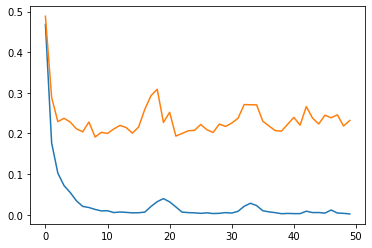

In [21]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()